# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from unidecode import unidecode
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import string


# READ

In [2]:
#Alterar o PATH pelo path de onde deseja ler os arquivos .csv
df = pd.read_csv('C:/PATH' , sep = ';', encoding='utf-16',header=None)
df2 = pd.read_csv('C:/PATH' , sep = ';', encoding='utf-16',header=None)
df3 = pd.read_csv('C:/PATH' , sep = ';', encoding='utf-16',header=None)
df4 = pd.read_csv('C:/PATH' , sep = ';', encoding='utf-16',header=None)


In [3]:
df.columns =['IdPedido','ProtocoloPedido','Esfera','OrgaoDestinatario','Situacao','DataRegistro','ResumoSolicitacao','DetalhamentoSolicitacao','PrazoAtendimento','FoiProrrogado','FoiReencaminhado','FormaResposta','OrigemSolicitacao','IdSolicitante','AssuntoPedido','SubAssuntoPedido','Tag','DataResposta','Resposta','Decisao','EspecificacaoDecisao']
df2.columns =['IdPedido','ProtocoloPedido','Esfera','OrgaoDestinatario','Situacao','DataRegistro','ResumoSolicitacao','DetalhamentoSolicitacao','PrazoAtendimento','FoiProrrogado','FoiReencaminhado','FormaResposta','OrigemSolicitacao','IdSolicitante','AssuntoPedido','SubAssuntoPedido','Tag','DataResposta','Resposta','Decisao','EspecificacaoDecisao']
df3.columns =['IdPedido','ProtocoloPedido','Esfera','OrgaoDestinatario','Situacao','DataRegistro','ResumoSolicitacao','DetalhamentoSolicitacao','PrazoAtendimento','FoiProrrogado','FoiReencaminhado','FormaResposta','OrigemSolicitacao','IdSolicitante','AssuntoPedido','SubAssuntoPedido','Tag','DataResposta','Resposta','Decisao','EspecificacaoDecisao']
df4.columns =['IdPedido','ProtocoloPedido','Esfera','OrgaoDestinatario','Situacao','DataRegistro','ResumoSolicitacao','DetalhamentoSolicitacao','PrazoAtendimento','FoiProrrogado','FoiReencaminhado','FormaResposta','OrigemSolicitacao','IdSolicitante','AssuntoPedido','SubAssuntoPedido','Tag','DataResposta','Resposta','Decisao','EspecificacaoDecisao']


In [4]:
df_saude = df.loc[df['OrgaoDestinatario'] == "MS – Ministério da Saúde"].copy()
df_saude2 = df2.loc[df2['OrgaoDestinatario'] == "MS – Ministério da Saúde"].copy()
df_saude3 = df3.loc[df3['OrgaoDestinatario'] == "MS – Ministério da Saúde"].copy()
df_saude4 = df4.loc[df4['OrgaoDestinatario'] == "MS – Ministério da Saúde"].copy()

In [5]:
df_saude


,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,DataRegistro,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,...,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,DataResposta,Resposta,Decisao,EspecificacaoDecisao
10,1493024,25820000001201869,Federal,MS – Ministério da Saúde,Concluída,01/01/2018,Repasses anuais a hospitais universitários,"Por ano, entre 2007 e 2017, quanto (em reais) ...",22/01/2018,Não,...,Pelo sistema (com avisos por email),Internet,2309780,Outros em Saúde,,,22/01/2018,OS REPASSES FEDERAIS REALIZADOS PELO FUNDO NAC...,Acesso Concedido,Resposta solicitada inserida no Fala.Br
56,1493082,25820000003201858,Federal,MS – Ministério da Saúde,Concluída,02/01/2018,Dúvidas à respeito de Cuidados Transfusionais ...,"Ilmo Sr (a), Boa tarde! Meu nome é Kátia R...",22/01/2018,Não,...,Pelo sistema (com avisos por email),Internet,2847134,Outros em Saúde,,,22/01/2018,"Prezada, Segue, em 2 anexos, a resposta dispo...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
57,1493083,25820000004201801,Federal,MS – Ministério da Saúde,Concluída,02/01/2018,Aplicação de Reiki no SUS.,Bom dia! No ano passado foi divulgado que tera...,22/01/2018,Não,...,Pelo sistema (com avisos por email),Internet,2847133,Outros em Saúde,,,22/01/2018,Os profissionais que desejam atender com práti...,Acesso Concedido,Resposta solicitada inserida no Fala.Br
101,1493151,25820000006201891,Federal,MS – Ministério da Saúde,Concluída,02/01/2018,Doença,"Bom Dia, gostaria de saber como faço para reso...",01/02/2018,Sim,...,Pelo sistema (com avisos por email),Internet,2847193,Outros em Saúde,,,31/01/2018,"PREZADA CIDADã, INFORMAMOS ABAIXO A RESPOSTA à...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
180,1493246,25820000009201825,Federal,MS – Ministério da Saúde,Concluída,02/01/2018,Quantidade de medicamentos oncologicos enviado...,"Qual a quantidade mensal de Imatinibe, Dasatin...",22/01/2018,Não,...,Pelo sistema (com avisos por email),Internet,2835133,Medicamentos e Aparelhos,,,22/01/2018,"EM ATENçãO A SOLICITAçãO, SEGUE ANEXO COM RESP...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91414,1628789,25820008138201861,Federal,MS – Ministério da Saúde,Concluída,30/12/2018,Número Localizador da CNS,Número Localizador CNS,21/01/2019,Não,...,Pelo sistema (com avisos por email),Internet,0,Outros em Saúde,,,21/01/2019,Prezado (a) senhor (a) Em atenção a vossa ...,Acesso Concedido,Resposta solicitada inserida no Fala.Br
91415,1628790,25820008139201814,Federal,MS – Ministério da Saúde,Concluída,30/12/2018,Consulta Valor Pago Ajuda de Custo Programa Ma...,Gostaria de solicitar o valor pago pela Prefei...,21/01/2019,Não,...,Pelo sistema (com avisos por email),Internet,0,Outros em Saúde,,,21/01/2019,NOTA TéCNICA Nº 2/2019-CGPS/DEPREPS/SGTES/MS ...,Acesso Concedido,Resposta solicitada inserida no Fala.Br
91426,1628811,25820008140201831,Federal,MS – Ministério da Saúde,Concluída,31/12/2018,PB4,Solicitei o documento PB4 e me foi entregue o ...,21/01/2019,Não,...,Pelo sistema (com avisos por email),Internet,2971348,Outros em Saúde,,,21/01/2019,"Prezado cidadão, A) é necessário o comparec...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
91431,1628818,25820008141201885,Federal,MS – Ministério da Saúde,Concluída,31/12/2018,"Solicito, por gentileza, base de dados do SIA...","Solicito, por gentileza, acesso e disponibiliz...",31/01/2019,Sim,...,Pelo sistema (com avisos por email),Internet,0,Outros em Saúde,,,25/01/2019,"Prezado (a) cidadão, é importante destacar ...",Acesso Concedido,Comunicada necessidade de pagamento de custos ...


# % Pedidos Respondidos

In [6]:
# Para saber as categorias das decisoes de acesso
df_saude['Decisao'].value_counts()

Acesso Concedido                                            3867
Acesso Parcialmente Concedido                                215
Acesso Negado                                                185
Pergunta Duplicada/Repetida                                   86
Informação Inexistente                                        67
Órgão não tem competência para responder sobre o assunto      61
Não se trata de solicitação de informação                     47
Name: Decisao, dtype: int64

In [7]:
def porcentagem_resposta(df_saude):
    tamanho_df_saude = df_saude.shape[0]
    tamanho_df_saude

    respondidos_df_saude = df_saude.loc[df_saude['Decisao']=='Acesso Concedido'].shape[0]
    respondidos_df_saude = respondidos_df_saude / tamanho_df_saude*100
    respondidos_df_saude = float(f'{respondidos_df_saude:.2f}')
    print('Acesso Concedido : ' + str(respondidos_df_saude) +'%' )

    respondidos_df_saude_parcial = df_saude.loc[df_saude['Decisao']=='Acesso Parcialmente Concedido'].shape[0]
    respondidos_df_saude_parcial = respondidos_df_saude_parcial / tamanho_df_saude*100
    respondidos_df_saude_parcial = float(f'{respondidos_df_saude_parcial:.2f}')
    print('Acesso Parcialmente Concedido : ' + str(respondidos_df_saude_parcial) +'%' )

    negado_df_saude = df_saude.loc[df_saude['Decisao']=='Acesso Negado'].shape[0]
    negado_df_saude = negado_df_saude / tamanho_df_saude*100
    negado_df_saude = float(f'{negado_df_saude:.2f}')
    print('Acesso Negado : ' + str(negado_df_saude) +'%' )

    duplicado_df_saude = df_saude.loc[df_saude['Decisao']=='Pergunta Duplicada/Repetida'].shape[0]
    duplicado_df_saude = duplicado_df_saude / tamanho_df_saude*100
    duplicado_df_saude = float(f'{duplicado_df_saude:.2f}')
    print('Pergunta Duplicada/Repetida : ' + str(duplicado_df_saude) +'%' )

    info_inexistente_df_saude = df_saude.loc[df_saude['Decisao']=='Informação Inexistente'].shape[0]
    info_inexistente_df_saude = info_inexistente_df_saude / tamanho_df_saude*100
    info_inexistente_df_saude = float(f'{info_inexistente_df_saude:.2f}')
    print('Informação Inexistente : ' + str(info_inexistente_df_saude) +'%' )

    orgao_errado_df_saude = df_saude.loc[df_saude['Decisao']=='Órgão não tem competência para responder sobre o assunto'].shape[0]
    orgao_errado_df_saude = orgao_errado_df_saude / tamanho_df_saude*100
    orgao_errado_df_saude = float(f'{orgao_errado_df_saude:.2f}')
    print('Órgão não tem competência para responder sobre o assunto : ' + str(orgao_errado_df_saude) +'%' )

    nao_e_pedido_df_saude = df_saude.loc[df_saude['Decisao']=='Não se trata de solicitação de informação'].shape[0]
    nao_e_pedido_df_saude = nao_e_pedido_df_saude / tamanho_df_saude*100
    nao_e_pedido_df_saude = float(f'{nao_e_pedido_df_saude:.2f}')
    print('Não se trata de solicitação de informação : ' + str(nao_e_pedido_df_saude) +'%' )

In [8]:
def porcentagem_resposta_por_assunto(df_saude, assunto = 'Outros em Saúde'):
    tamanho_df_saude = df_saude.loc[df_saude['AssuntoPedido']==assunto].shape[0]
    df_saude = df_saude.loc[df_saude['AssuntoPedido']==assunto]
    print('ASSUNTO : '+ assunto)

    respondidos_df_saude = df_saude.loc[df_saude['Decisao']=='Acesso Concedido'].shape[0]
    respondidos_df_saude = respondidos_df_saude / tamanho_df_saude*100
    respondidos_df_saude = float(f'{respondidos_df_saude:.2f}')
    print('Acesso Concedido : ' + str(respondidos_df_saude) +'%' )

    respondidos_df_saude_parcial = df_saude.loc[df_saude['Decisao']=='Acesso Parcialmente Concedido'].shape[0]
    respondidos_df_saude_parcial = respondidos_df_saude_parcial / tamanho_df_saude*100
    respondidos_df_saude_parcial = float(f'{respondidos_df_saude_parcial:.2f}')
    print('Acesso Parcialmente Concedido : ' + str(respondidos_df_saude_parcial) +'%' )

    negado_df_saude = df_saude.loc[df_saude['Decisao']=='Acesso Negado'].shape[0]
    negado_df_saude = negado_df_saude / tamanho_df_saude*100
    negado_df_saude = float(f'{negado_df_saude:.2f}')
    print('Acesso Negado : ' + str(negado_df_saude) +'%' )

    duplicado_df_saude = df_saude.loc[df_saude['Decisao']=='Pergunta Duplicada/Repetida'].shape[0]
    duplicado_df_saude = duplicado_df_saude / tamanho_df_saude*100
    duplicado_df_saude = float(f'{duplicado_df_saude:.2f}')
    print('Pergunta Duplicada/Repetida : ' + str(duplicado_df_saude) +'%' )

    info_inexistente_df_saude = df_saude.loc[df_saude['Decisao']=='Informação Inexistente'].shape[0]
    info_inexistente_df_saude = info_inexistente_df_saude / tamanho_df_saude*100
    info_inexistente_df_saude = float(f'{info_inexistente_df_saude:.2f}')
    print('Informação Inexistente : ' + str(info_inexistente_df_saude) +'%' )

    orgao_errado_df_saude = df_saude.loc[df_saude['Decisao']=='Órgão não tem competência para responder sobre o assunto'].shape[0]
    orgao_errado_df_saude = orgao_errado_df_saude / tamanho_df_saude*100
    orgao_errado_df_saude = float(f'{orgao_errado_df_saude:.2f}')
    print('Órgão não tem competência para responder sobre o assunto : ' + str(orgao_errado_df_saude) +'%' )

    nao_e_pedido_df_saude = df_saude.loc[df_saude['Decisao']=='Não se trata de solicitação de informação'].shape[0]
    nao_e_pedido_df_saude = nao_e_pedido_df_saude / tamanho_df_saude*100
    nao_e_pedido_df_saude = float(f'{nao_e_pedido_df_saude:.2f}')
    print('Não se trata de solicitação de informação : ' + str(nao_e_pedido_df_saude) +'%' )
    print()

In [9]:
# Popula array de respostas para plotar no grafico
def array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Concedido'):
    tamanho_df_saude = df_saude.shape[0]
    tamanho_df_saude
    respondidos = []

    respondidos_df_saude = df_saude.loc[df_saude['Decisao']==condicao].shape[0]
    respondidos_df_saude = respondidos_df_saude / tamanho_df_saude*100
    respondidos_df_saude = float(f'{respondidos_df_saude:.2f}')
    respondidos.append(respondidos_df_saude)

    respondidos_df_saude2 = df_saude2.loc[df_saude2['Decisao']==condicao].shape[0]
    respondidos_df_saude2 = respondidos_df_saude2 / tamanho_df_saude*100
    respondidos_df_saude2 = float(f'{respondidos_df_saude2:.2f}')
    respondidos.append(respondidos_df_saude2)

    respondidos_df_saude3 = df_saude3.loc[df_saude3['Decisao']==condicao].shape[0]
    respondidos_df_saude3 = respondidos_df_saude3 / tamanho_df_saude*100
    respondidos_df_saude3 = float(f'{respondidos_df_saude3:.2f}')
    respondidos.append(respondidos_df_saude3)

    respondidos_df_saude4 = df_saude4.loc[df_saude4['Decisao']==condicao].shape[0]
    respondidos_df_saude4 = respondidos_df_saude4 / tamanho_df_saude*100
    respondidos_df_saude4 = float(f'{respondidos_df_saude4:.2f}')
    respondidos.append(respondidos_df_saude4)
    return respondidos
    

# Porcentagem da decisão de pedidos por ano

## 2018

In [10]:
porcentagem_resposta(df_saude)

Acesso Concedido : 85.4%
Acesso Parcialmente Concedido : 4.75%
Acesso Negado : 4.09%
Pergunta Duplicada/Repetida : 1.9%
Informação Inexistente : 1.48%
Órgão não tem competência para responder sobre o assunto : 1.35%
Não se trata de solicitação de informação : 1.04%


## 2019

In [11]:
porcentagem_resposta(df_saude2)

Acesso Concedido : 83.26%
Acesso Parcialmente Concedido : 3.69%
Acesso Negado : 4.9%
Pergunta Duplicada/Repetida : 1.88%
Informação Inexistente : 1.75%
Órgão não tem competência para responder sobre o assunto : 2.33%
Não se trata de solicitação de informação : 2.19%


## 2020

In [12]:
porcentagem_resposta(df_saude3)

Acesso Concedido : 79.27%
Acesso Parcialmente Concedido : 4.31%
Acesso Negado : 7.55%
Pergunta Duplicada/Repetida : 1.96%
Informação Inexistente : 1.72%
Órgão não tem competência para responder sobre o assunto : 2.77%
Não se trata de solicitação de informação : 2.42%


## 2021

In [13]:
porcentagem_resposta(df_saude4)

Acesso Concedido : 75.29%
Acesso Parcialmente Concedido : 5.88%
Acesso Negado : 9.01%
Pergunta Duplicada/Repetida : 1.85%
Informação Inexistente : 3.51%
Órgão não tem competência para responder sobre o assunto : 2.39%
Não se trata de solicitação de informação : 2.08%


# Plot das porcentagens dos acessos

In [14]:
plt.rcParams["figure.figsize"] = (20,10)

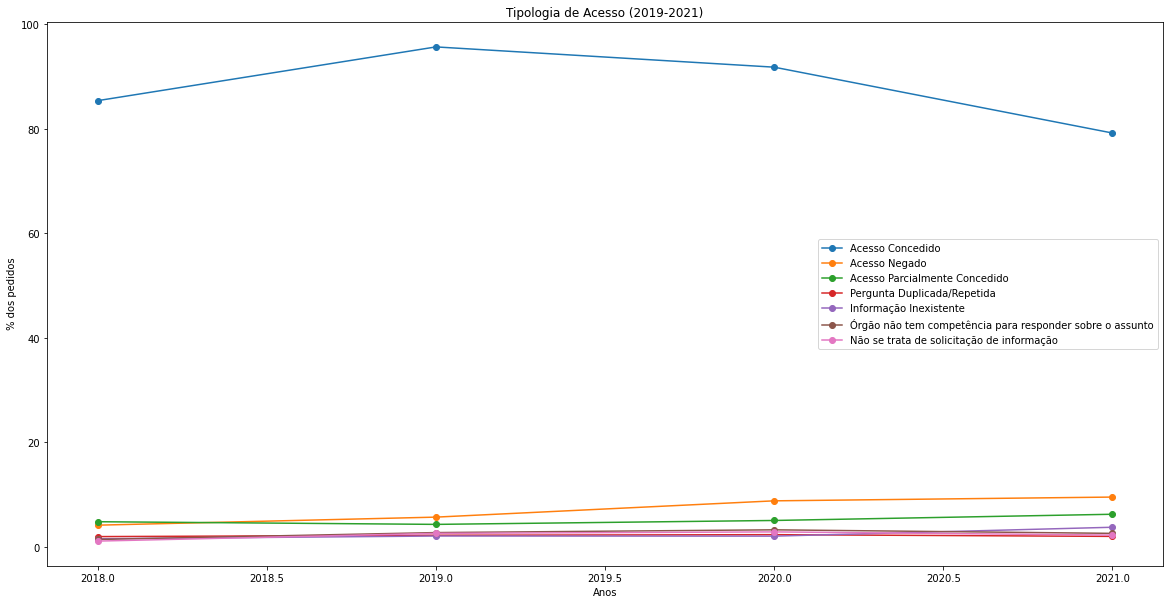

In [15]:
x1 = [2018,2019,2020,2021]
y1 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Concedido')
plt.plot(x1, y1, label = "Acesso Concedido",marker='o')
  
x2 = [2018,2019,2020,2021]
y2 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Negado')
plt.plot(x2, y2, label = "Acesso Negado",marker='o')

x3 = [2018,2019,2020,2021]
y3 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Parcialmente Concedido')
plt.plot(x3, y3, label = "Acesso Parcialmente Concedido",marker='o')

x4 = [2018,2019,2020,2021]
y4 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Pergunta Duplicada/Repetida')
plt.plot(x4, y4, label = "Pergunta Duplicada/Repetida",marker='o')
  
x5 = [2018,2019,2020,2021]
y5 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Informação Inexistente')
plt.plot(x5, y5, label = "Informação Inexistente",marker='o')

x6 = [2018,2019,2020,2021]
y6 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Órgão não tem competência para responder sobre o assunto')
plt.plot(x6, y6, label = "Órgão não tem competência para responder sobre o assunto",marker='o')

x7 = [2018,2019,2020,2021]
y7 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Não se trata de solicitação de informação')
plt.plot(x7, y7, label = "Não se trata de solicitação de informação",marker='o')

plt.xlabel('Anos')
plt.ylabel(' % dos pedidos')
plt.title('Tipologia de Acesso (2019-2021)')
plt.legend()
plt.show()


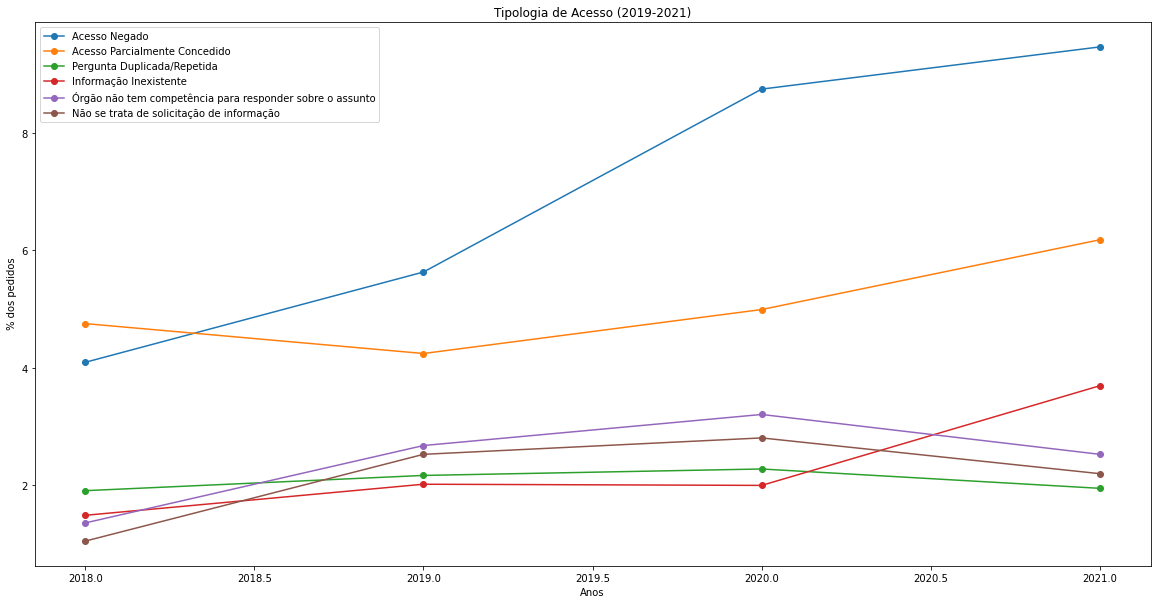

In [16]:
#x1 = [2018,2019,2020,2021]
#y1 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Concedido')
#plt.plot(x1, y1, label = "Acesso Concedido",marker='o')

#Zoom nos acessos com menor porcentagem
  
x2 = [2018,2019,2020,2021]
y2 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Negado')
plt.plot(x2, y2, label = "Acesso Negado",marker='o')

x3 = [2018,2019,2020,2021]
y3 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Acesso Parcialmente Concedido')
plt.plot(x3, y3, label = "Acesso Parcialmente Concedido",marker='o')

x4 = [2018,2019,2020,2021]
y4 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Pergunta Duplicada/Repetida')
plt.plot(x4, y4, label = "Pergunta Duplicada/Repetida",marker='o')
  
x5 = [2018,2019,2020,2021]
y5 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Informação Inexistente')
plt.plot(x5, y5, label = "Informação Inexistente",marker='o')

x6 = [2018,2019,2020,2021]
y6 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Órgão não tem competência para responder sobre o assunto')
plt.plot(x6, y6, label = "Órgão não tem competência para responder sobre o assunto",marker='o')

x7 = [2018,2019,2020,2021]
y7 = array_resposta(df_saude,df_saude2,df_saude3,df_saude4, condicao ='Não se trata de solicitação de informação')
plt.plot(x7, y7, label = "Não se trata de solicitação de informação",marker='o')

plt.xlabel('Anos')
plt.ylabel(' % dos pedidos')
plt.title('Tipologia de Acesso (2019-2021)')
plt.legend()
plt.show()

# Porcentagem da decisão de pedidos por ano por top 4 Assuntos

## 2018

In [180]:
df_saude['AssuntoPedido'].value_counts()

Outros em Saúde                  4165
Medicamentos e Aparelhos          278
Atendimento Básico                 84
Defesa e vigilância sanitária       1
Name: AssuntoPedido, dtype: int64

In [181]:
porcentagem_resposta_por_assunto(df_saude, assunto = 'Outros em Saúde')
porcentagem_resposta_por_assunto(df_saude, assunto = 'Medicamentos e Aparelhos')
porcentagem_resposta_por_assunto(df_saude, assunto = 'Atendimento Básico')
porcentagem_resposta_por_assunto(df_saude, assunto = 'Defesa e vigilância sanitária')

ASSUNTO : Outros em Saúde
Acesso Concedido : 85.31%
Acesso Parcialmente Concedido : 4.63%
Acesso Negado : 4.37%
Pergunta Duplicada/Repetida : 1.99%
Informação Inexistente : 1.49%
Órgão não tem competência para responder sobre o assunto : 1.1%
Não se trata de solicitação de informação : 1.1%

ASSUNTO : Medicamentos e Aparelhos
Acesso Concedido : 88.85%
Acesso Parcialmente Concedido : 6.83%
Acesso Negado : 0.72%
Pergunta Duplicada/Repetida : 0.36%
Informação Inexistente : 1.44%
Órgão não tem competência para responder sobre o assunto : 1.8%
Não se trata de solicitação de informação : 0.0%

ASSUNTO : Atendimento Básico
Acesso Concedido : 79.76%
Acesso Parcialmente Concedido : 3.57%
Acesso Negado : 1.19%
Pergunta Duplicada/Repetida : 2.38%
Informação Inexistente : 1.19%
Órgão não tem competência para responder sobre o assunto : 10.71%
Não se trata de solicitação de informação : 1.19%

ASSUNTO : Defesa e vigilância sanitária
Acesso Concedido : 0.0%
Acesso Parcialmente Concedido : 0.0%
Acess

## 2019

In [182]:
df_saude2['AssuntoPedido'].value_counts()

Outros em Saúde                  4738
Medicamentos e Aparelhos          388
Atendimento Básico                 71
Defesa e vigilância sanitária       7
Name: AssuntoPedido, dtype: int64

In [183]:
porcentagem_resposta_por_assunto(df_saude2, assunto = 'Outros em Saúde')
porcentagem_resposta_por_assunto(df_saude2, assunto = 'Medicamentos e Aparelhos')
porcentagem_resposta_por_assunto(df_saude2, assunto = 'Atendimento Básico')
porcentagem_resposta_por_assunto(df_saude2, assunto = 'Defesa e vigilância sanitária')

ASSUNTO : Outros em Saúde
Acesso Concedido : 82.71%
Acesso Parcialmente Concedido : 3.8%
Acesso Negado : 5.11%
Pergunta Duplicada/Repetida : 1.94%
Informação Inexistente : 1.75%
Órgão não tem competência para responder sobre o assunto : 2.34%
Não se trata de solicitação de informação : 2.34%

ASSUNTO : Medicamentos e Aparelhos
Acesso Concedido : 90.98%
Acesso Parcialmente Concedido : 2.58%
Acesso Negado : 1.8%
Pergunta Duplicada/Repetida : 0.77%
Informação Inexistente : 2.06%
Órgão não tem competência para responder sobre o assunto : 1.29%
Não se trata de solicitação de informação : 0.52%

ASSUNTO : Atendimento Básico
Acesso Concedido : 84.51%
Acesso Parcialmente Concedido : 2.82%
Acesso Negado : 5.63%
Pergunta Duplicada/Repetida : 1.41%
Informação Inexistente : 0.0%
Órgão não tem competência para responder sobre o assunto : 4.23%
Não se trata de solicitação de informação : 1.41%

ASSUNTO : Defesa e vigilância sanitária
Acesso Concedido : 14.29%
Acesso Parcialmente Concedido : 0.0%
Ace

## 2020

In [184]:
df_saude3['AssuntoPedido'].value_counts().head(4)

Outros em Saúde             2928
Acesso à informação          797
Coronavírus (COVID-19)       712
Medicamentos e Aparelhos     310
Name: AssuntoPedido, dtype: int64

In [185]:
porcentagem_resposta_por_assunto(df_saude3, assunto = 'Outros em Saúde')
porcentagem_resposta_por_assunto(df_saude3, assunto = 'Acesso à informação')
porcentagem_resposta_por_assunto(df_saude3, assunto = 'Coronavírus (COVID-19)')
porcentagem_resposta_por_assunto(df_saude3, assunto = 'Medicamentos e Aparelhos')

ASSUNTO : Outros em Saúde
Acesso Concedido : 77.83%
Acesso Parcialmente Concedido : 4.23%
Acesso Negado : 8.74%
Pergunta Duplicada/Repetida : 2.12%
Informação Inexistente : 1.57%
Órgão não tem competência para responder sobre o assunto : 2.83%
Não se trata de solicitação de informação : 2.66%

ASSUNTO : Acesso à informação
Acesso Concedido : 82.69%
Acesso Parcialmente Concedido : 4.14%
Acesso Negado : 5.65%
Pergunta Duplicada/Repetida : 1.88%
Informação Inexistente : 3.26%
Órgão não tem competência para responder sobre o assunto : 1.51%
Não se trata de solicitação de informação : 0.88%

ASSUNTO : Coronavírus (COVID-19)
Acesso Concedido : 82.16%
Acesso Parcialmente Concedido : 5.62%
Acesso Negado : 6.04%
Pergunta Duplicada/Repetida : 1.26%
Informação Inexistente : 0.84%
Órgão não tem competência para responder sobre o assunto : 2.25%
Não se trata de solicitação de informação : 1.83%

ASSUNTO : Medicamentos e Aparelhos
Acesso Concedido : 80.32%
Acesso Parcialmente Concedido : 0.97%
Acess

## 2021

In [186]:
df_saude4['AssuntoPedido'].value_counts().head(4)

Acesso à informação         2356
Outros em Saúde              792
Coronavírus (COVID-19)       523
Medicamentos e Aparelhos     178
Name: AssuntoPedido, dtype: int64

In [187]:
porcentagem_resposta_por_assunto(df_saude4, assunto = 'Acesso à informação')
porcentagem_resposta_por_assunto(df_saude4, assunto = 'Outros em Saúde')
porcentagem_resposta_por_assunto(df_saude4, assunto = 'Coronavírus (COVID-19)')
porcentagem_resposta_por_assunto(df_saude4, assunto = 'Medicamentos e Aparelhos')

ASSUNTO : Acesso à informação
Acesso Concedido : 73.73%
Acesso Parcialmente Concedido : 5.9%
Acesso Negado : 11.54%
Pergunta Duplicada/Repetida : 1.7%
Informação Inexistente : 4.03%
Órgão não tem competência para responder sobre o assunto : 2.04%
Não se trata de solicitação de informação : 1.06%

ASSUNTO : Outros em Saúde
Acesso Concedido : 79.17%
Acesso Parcialmente Concedido : 5.68%
Acesso Negado : 5.18%
Pergunta Duplicada/Repetida : 2.53%
Informação Inexistente : 3.91%
Órgão não tem competência para responder sobre o assunto : 2.02%
Não se trata de solicitação de informação : 1.52%

ASSUNTO : Coronavírus (COVID-19)
Acesso Concedido : 74.76%
Acesso Parcialmente Concedido : 7.07%
Acesso Negado : 7.84%
Pergunta Duplicada/Repetida : 1.15%
Informação Inexistente : 3.25%
Órgão não tem competência para responder sobre o assunto : 2.49%
Não se trata de solicitação de informação : 3.44%

ASSUNTO : Medicamentos e Aparelhos
Acesso Concedido : 79.21%
Acesso Parcialmente Concedido : 5.62%
Acesso

# Montar o txt para o Iramuteq

In [188]:
final_stopwords = ['prezado','prezados','solicito','a','a/a', 'a/c', 'a/m', 'aa', 'abr', 'abrev', 'abril', 'ac', 'acad', 'acerca', 'acesso', 'ad', 'adeus', 'adm', 'adv', 'advo', 'advoc', 'ago', 'agora', 'agr', 'agric', 'agron', 'ai', 'ainda', 'aj', 'ajte', 'al', 'alem', 'algmas', 'algo', 'alguem', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'alii', 'alm', 'alq', 'alt', 'altit', 'alv', 'ambos', 'amg', 'amigo', 'ampla', 'amplas', 'amplo', 'amplos', 'anexo', 'anno', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'ap', 'apart', 'apenas', 'apend', 'apoio', 'apontar', 'apos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'arc', 'arco', 'area', 'arit', 'aritm', 'arq', 'arr', 'art', 'arts', 'as', 'assem', 'assim', 'assoc', 'at', 'ate', 'atencao', 'atras', 'atraves', 'atte', 'autor', 'av', 'b', 'ba', 'baixo', 'bal', 'base', 'bastante', 'bat', 'bb', 'bebe', 'beco', 'beis', 'bel', 'bela', 'belas', 'bem', 'bene', 'bh', 'bispo', 'bj', 'bjo', 'bjos', 'bjoss', 'bjs', 'bjss', 'blz', 'boa', 'boas', 'bom', 'bons', 'bpo', 'br', 'breve', 'brig', 'c', 'c/', 'c/a', 'c/c', 'ca', 'cab', 'cada', 'caixa', 'cal', 'calc', 'caminho', 'cap', 'caps', 'card', 'casa', 'cast', 'cat', 'catorze', 'causa', 'cdp', 'cedo', 'cel', 'cento', 'certamente', 'certeza', 'cf', 'cfe', 'cfm', 'cfr', 'ch', 'cia', 'cima', 'cinco', 'circ', 'cit', 'cl', 'clg', 'cmrj', 'co', 'cod', 'coisa', 'coisas', 'col', 'cols', 'com', 'como', 'comor', 'comprido', 'comte', 'con', 'conf', 'conhecido', 'cono', 'cons', 'conselho', 'considerar', 'conso', 'cont', 'conta', 'contra', 'contudo', 'copiar', 'corrente', 'cos', 'cp', 'cred', 'ctba', 'custa', 'cvs', 'cx', 'd', 'da', 'dado', 'dao', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'data', 'dd', 'de', 'deb', 'debaixo', 'dec', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'dep', 'depois', 'deps', 'des', 'desa', 'desc', 'desde', 'desligado', 'desp', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'devera', 'deverao', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diac', 'diante', 'dic', 'die', 'digno', 'dipl', 'direita', 'disse', 'disso', 'disto', 'dito', 'div', 'diz', 'dizem', 'dizer', 'dlc', 'do', 'doc', 'docs', 'dois', 'dom', 'dona', 'dor', 'dos', 'doze', 'dr', 'dra', 'dras', 'drs', 'dt', 'duas', 'duvida', 'duzia', 'dz', 'e', 'ed', 'edif', 'educ', 'ee', 'eis', 'el', 'ela', 'elas', 'ele', 'eles', 'em', 'ema', 'emas', 'embora', 'emmo', 'end', 'enf', 'enfa', 'eng', 'engo', 'enquanto', 'entao', 'entre', 'enviar', 'era', 'eram', 'eramos', 'erat', 'erro', 'es', 'esc', 'essa', 'essas', 'esse', 'esses', 'est', 'esta', 'estado', 'estamos', 'estao', 'estar', 'estara', 'estas', 'estava', 'estavam', 'estavamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiveramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivessemos', 'estiveste', 'estivestes', 'estou', 'et', 'etc', 'eu', 'ex', 'exa', 'exas', 'exemplo', 'exma', 'exmo', 'fac', 'faco', 'falta', 'fara', 'fasc', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'fazia', 'feita', 'feitas', 'feito', 'feitos', 'fem', 'fev', 'fez', 'ff', 'fg', 'fig', 'fim', 'final', 'fj', 'fl', 'foi', 'fol', 'folha', 'fols', 'fomos', 'for', 'fora', 'foram', 'foramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fossemos', 'foste', 'fostes', 'fs', 'fui', 'g/p', 'gal', 'gen', 'geral', 'glr', 'gostar', 'gostaria', 'gov', 'gr', 'grande', 'grandes', 'grao', 'grosa', 'grs', 'grupo', 'ha', 'hab', 'haja', 'hajam', 'hajamos', 'hao', 'havemos', 'haver', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houveramos', 'houverao', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveriamos', 'houvermos', 'houvesse', 'houvessem', 'houvessemos', 'ia', 'ib', 'ibid', 'icq', 'id', 'idem', 'il', 'ilha', 'ilma', 'ilmo', 'ind', 'inf', 'informacao', 'informacoes', 'informar', 'iniciar', 'inicio', 'ir', 'ira', 'isso', 'ista', 'iste', 'isto', 'ja', 'jan', 'jd', 'jpa', 'juizo', 'jul', 'julho', 'jun', 'junho', 'jur', 'kd', 'kra', 'kta', 'la', 'lado', 'largo', 'ldeg', 'leg', 'legal', 'legs', 'legua', 'letra', 'lg', 'lhe', 'lhes', 'ligado', 'liv', 'lle', 'lo', 'local', 'log', 'logar', 'logo', 'longe', 'lt', 'ltda', 'lugar', 'm', 'm/', 'm/c', 'm/c/c', 'm/ch', 'm/com', 'm/d', 'm/no', 'm/o', 'm/p', 'm/ref', 'm/rem', 'm/s', 'ma', 'mag', 'maga', 'magas', 'mai', 'mail', 'maio', 'maior', 'maioria', 'maiorias', 'mais', 'maj', 'major', 'mal', 'mao', 'mar', 'marco', 'mas', 'masc', 'maximo', 'me', 'med', 'meio', 'memo', 'memor', 'menor', 'menos', 'mes', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'ministerio', 'mlle', 'mm', 'mme', 'mo', 'momento', 'mons', 'mr', 'mrs', 'ms', 'msm', 'mss', 'muita', 'muitas', 'muito', 'muitos', 'mun', 'n/', 'n/c', 'n/ch', 'n/l', 'n/s', 'na', 'nada', 'nao', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'naum', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ngm', 'ninguem', 'nivel', 'niver', 'no', 'noite', 'nome', 'nomes', 'nos', 'nossa', 'nossas', 'nosso', 'nossos', 'nov', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'numerar', 'numero', 'nunca', 'o', 'o/', 'ob', 'obg', 'obra', 'obrigada', 'obrigado', 'obrigar', 'obs', 'of', 'oitava', 'oitavo', 'oito', 'ola', 'onde', 'ontem', 'onze', 'op', 'or', 'org', 'os', 'ou', 'out', 'outra', 'outras', 'outro', 'outros', 'p/', 'p/c', 'padre', 'pagou', 'pal', 'palmo', 'par', 'para', 'parece', 'paro', 'parte', 'partir', 'pass', 'passo', 'paucas', 'pc', 'pda', 'pdp', 'pe', 'peca', 'peco', 'pede', 'pegar', 'pela', 'pelas', 'pelo', 'pelos', 'peq', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'periodo', 'perto', 'pessoas', 'pg', 'pgto', 'ph', 'po', 'pode', 'podem', 'podendo', 'poder', 'podera', 'poderia', 'poderiam', 'podia', 'podiam', 'poe', 'poem', 'pois', 'pol', 'ponto', 'pontos', 'por', 'porem', 'porque', 'port', 'posicao', 'possivel', 'possivelmente', 'posso', 'post', 'pouca', 'poucas', 'pouco', 'poucos', 'povo', 'pp', 'pprt', 'pq', 'pr', 'praca', 'praia', 'pref', 'pres', 'presb', 'prezar', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'prob', 'probl', 'proc', 'prof', 'profa', 'profs', 'prom', 'promeiro', 'propria', 'proprias', 'proprio', 'proprios', 'proxima', 'proximas', 'proximo', 'proximos', 'prq', 'ps', 'publicar', 'pude', 'puderam', 'qal', 'ql', 'qnd', 'qt', 'qts', 'quais', 'qual', 'qualquer', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questao', 'quieto', 'quinta', 'quinto', 'quinze', 'quod', 'r', 'ra', 'ras', 'rdv', 'realizar', 'rec', 'ref', 'refetente', 'reg', 'rei', 'rel', 'relacao', 'relat', 'rem', 'remte', 'res', 'resposta', 'reu', 'rev', 'reva', 'revas', 'revdo', 'revma', 'revmo', 'revo', 'rg', 'rj', 'rod', 'rs', 'rtn', 'rua', 'rubr', 's', 's/a', 's/c', 's/d', 'sa', 'sabe', 'sabem', 'saber', 'sac', 'saco', 'sacos', 'santa', 'santo', 'sao', 'sarg', 'sas', 'satis', 'saude', 'sc', 'scs', 'sdds', 'se', 'sec', 'secao', 'secr', 'secs', 'seg', 'segs', 'seguinte', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'semin', 'sempre', 'sen', 'sendo', 'seno', 'ser', 'sera', 'serao', 'serei', 'seremos', 'seria', 'seriam', 'seriamos', 'serie', 'set', 'sete', 'setima', 'setimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sine', 'sistema', 'slc', 'smp', 'snt', 'so', 'sob', 'sobre', 'soc', 'sois', 'solicitar', 'somente', 'somos', 'sor', 'soror', 'sou', 'sp', 'sr', 'sra', 'sras', 'srs', 'srta', 'srtas', 'ss', 'sta', 'sto', 'sua', 'suas', 'suc', 'sul', 'ta', 'tal', 'talvez', 'tambem', 'tampouco', 'tanta', 'tantas', 'tanto', 'tao', 'tarde', 'tas', 'tb', 'tbm', 'tc', 'td', 'tdb', 'tds', 'te', 'tel', 'tem', 'temos', 'tempo', 'ten', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'tentar', 'tentaram', 'tente', 'tentei', 'ter', 'tera', 'terao', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teriamos', 'tes', 'test', 'testo', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tinhamos', 'tipo', 'tit', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tiveramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivessemos', 'tiveste', 'tivestes', 'tmj', 'to', 'toda', 'todas', 'todavia', 'todo', 'todos', 'tomo', 'tomos', 'ton', 'tonel', 'total', 'trab', 'trabalhar', 'trabalho', 'trat', 'tres', 'trevo', 'treze', 'trim', 'trv', 'ts', 'tt', 'tte', 'tu', 'tua', 'tuas', 'tudo', 'tv', 'uin', 'ultima', 'ultimas', 'ultimo', 'ultimos', 'um', 'uma', 'umas', 'un', 'univ', 'uns', 'uol', 'us', 'usa', 'usada', 'usado', 'usar', 'uso', 'v', 'vai', 'vais', 'val', 'valor', 'vao', 'varios', 'vc', 'vcs', 'vd', 'vde', 'veja', 'vem', 'vendo', 'vens', 'ver', 'verbi', 'verdade', 'verdadeiro', 'vet', 'vez', 'vezes', 'via', 'viagem', 'vice', 'vide', 'vig', 'vigo', 'vindo', 'vinte', 'vir', 'voce', 'voces', 'vol', 'vols', 'vos', 'vossa', 'vossas', 'vosso', 'vossos', 'vsf', 'x', 'zero']

In [189]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

## DF 2018

In [190]:
for col in ['DetalhamentoSolicitacao']:
    df_saude['DetalhamentoSolicitacao'] = df_saude['DetalhamentoSolicitacao'].astype(str).apply(unidecode)

df_saude['DetalhamentoSolicitacao'] = df_saude['DetalhamentoSolicitacao'].apply(remove_punctuations)
df_saude['DetalhamentoSolicitacao'] = df_saude['DetalhamentoSolicitacao'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_saude['DetalhamentoSolicitacao'] = df_saude['DetalhamentoSolicitacao'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
df_saude['DetalhamentoSolicitacao']

10       2007 2017 reais repassou reais hospital univer...
56       katia reis anjos cidada brasileira residente t...
57       passado divulgado terapias alternativas inclui...
101      resolver problema comunidade vila siriji vicen...
180      quantidade mensal imatinibe dasatinibe nilotin...
                               ...                        
91414                                      localizador cns
91415    pago prefeitura pinheiromaranhao destinado aju...
91426    solicitei documento pb4 entregue ib2 pb4 espec...
91431    gentileza disponibilizacao dados siasisesai mo...
91448      planilha recursos destinados municipio sitio rn
Name: DetalhamentoSolicitacao, Length: 4528, dtype: object

In [191]:
df_saude['agregado'] = '**** *' + df_saude['IdPedido'].astype(str) +'\n'+ df_saude['DetalhamentoSolicitacao'] + '\n' 
df_saude['agregado']

10       **** *1493024\n2007 2017 reais repassou reais ...
56       **** *1493082\nkatia reis anjos cidada brasile...
57       **** *1493083\npassado divulgado terapias alte...
101      **** *1493151\nresolver problema comunidade vi...
180      **** *1493246\nquantidade mensal imatinibe das...
                               ...                        
91414                     **** *1628789\nlocalizador cns\n
91415    **** *1628790\npago prefeitura pinheiromaranha...
91426    **** *1628811\nsolicitei documento pb4 entregu...
91431    **** *1628818\ngentileza disponibilizacao dado...
91448    **** *1628838\nplanilha recursos destinados mu...
Name: agregado, Length: 4528, dtype: object

In [192]:
#Alterar o PATH pelo path onde deseja salvar o arquivo
np.savetxt(r'C:/PATH/texto2018.txt', df_saude.agregado.values,fmt='%s')

## DF 2019

In [193]:
for col in ['DetalhamentoSolicitacao']:
    df_saude2['DetalhamentoSolicitacao'] = df_saude2['DetalhamentoSolicitacao'].astype(str).apply(unidecode)

df_saude2['DetalhamentoSolicitacao'] = df_saude2['DetalhamentoSolicitacao'].apply(remove_punctuations)
df_saude2['DetalhamentoSolicitacao'] = df_saude2['DetalhamentoSolicitacao'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_saude2['DetalhamentoSolicitacao'] = df_saude2['DetalhamentoSolicitacao'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
df_saude2['DetalhamentoSolicitacao']

7        manifestacao segadgo itens relacionados abaixo...
9        esclarecimentos corregedoria visto 2 servidora...
12       3tres servidor lotado dseiaraguaia removido mo...
13       confirmacao servidora vera lucia regis bogea s...
14       servidora leila maria silva rosa fonseca atual...
                               ...                        
95965    abortos legais praticados 2019 aumento reducao...
95993    chamo bruno 22 morador municipio brumado bahia...
96020                                  expandir boca igual
96075    centros especialidades odontologicas ceos aten...
96109    taxa brasileira suicidios sexo faixa etaria 10...
Name: DetalhamentoSolicitacao, Length: 5204, dtype: object

In [194]:
df_saude2['agregado'] = '**** *' + df_saude2['IdPedido'].astype(str) +'\n'+ df_saude2['DetalhamentoSolicitacao'] + '\n' 
df_saude2['agregado']

7        **** *1628870\nmanifestacao segadgo itens rela...
9        **** *1628873\nesclarecimentos corregedoria vi...
12       **** *1628876\n3tres servidor lotado dseiaragu...
13       **** *1628877\nconfirmacao servidora vera luci...
14       **** *1628878\nservidora leila maria silva ros...
                               ...                        
95965    **** *2212618\nabortos legais praticados 2019 ...
95993    **** *2212871\nchamo bruno 22 morador municipi...
96020                 **** *2213072\nexpandir boca igual\n
96075    **** *2213435\ncentros especialidades odontolo...
96109    **** *2213751\ntaxa brasileira suicidios sexo ...
Name: agregado, Length: 5204, dtype: object

In [195]:
#Alterar o PATH pelo path onde deseja salvar o arquivo
np.savetxt(r'C:/PATH/texto2019.txt', df_saude2.agregado.values,fmt='%s')

## DF 2020

In [196]:
for col in ['DetalhamentoSolicitacao']:
    df_saude3['DetalhamentoSolicitacao'] = df_saude3['DetalhamentoSolicitacao'].astype(str).apply(unidecode)

df_saude3['DetalhamentoSolicitacao'] = df_saude3['DetalhamentoSolicitacao'].apply(remove_punctuations)
df_saude3['DetalhamentoSolicitacao'] = df_saude3['DetalhamentoSolicitacao'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_saude3['DetalhamentoSolicitacao'] = df_saude3['DetalhamentoSolicitacao'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
df_saude3['DetalhamentoSolicitacao']

125       dados referentes planilhas sinan notificacoes ...
640       solicitacao 10 medicamentos judicializados 201...
641       custo anual 2015 2019 aquisicao insumos medica...
666       numeros vendas molecula farmacia popular dados...
732       duvidas andamento pronon precisa fgts inss apr...
                                ...                        
111441    acordo fundo rotatorio opasoms aquisicao serin...
111446    integra atas coe pedido respondido dezembro ja...
111504    doutoranda curso epidemiologia publica ensp fi...
111544    casos esquistossomose notificacao endereco pro...
111552    obitos registrados 2010 2011 2012 2013 2014 20...
Name: DetalhamentoSolicitacao, Length: 5244, dtype: object

In [197]:
df_saude3['agregado'] = '**** *' + df_saude3['IdPedido'].astype(str) +'\n'+ df_saude3['DetalhamentoSolicitacao'] + '\n' 
df_saude3['agregado']

125       **** *1436013\ndados referentes planilhas sina...
640       **** *1927867\nsolicitacao 10 medicamentos jud...
641       **** *1927875\ncusto anual 2015 2019 aquisicao...
666       **** *1928086\nnumeros vendas molecula farmaci...
732       **** *1928697\nduvidas andamento pronon precis...
                                ...                        
111441    **** *2792321\nacordo fundo rotatorio opasoms ...
111446    **** *2792400\nintegra atas coe pedido respond...
111504    **** *2793047\ndoutoranda curso epidemiologia ...
111544    **** *2793589\ncasos esquistossomose notificac...
111552    **** *2793668\nobitos registrados 2010 2011 20...
Name: agregado, Length: 5244, dtype: object

In [198]:
#Alterar o PATH pelo path onde deseja salvar o arquivo
np.savetxt(r'C:/PATH/texto2020.txt', df_saude3.agregado.values,fmt='%s')

## DF 2021  

In [199]:
for col in ['DetalhamentoSolicitacao']:
    df_saude4['DetalhamentoSolicitacao'] = df_saude4['DetalhamentoSolicitacao'].astype(str).apply(unidecode)

df_saude4['DetalhamentoSolicitacao'] = df_saude4['DetalhamentoSolicitacao'].apply(remove_punctuations)
df_saude4['DetalhamentoSolicitacao'] = df_saude4['DetalhamentoSolicitacao'].map(lambda x: x.lower() if isinstance(x,str) else x)
df_saude4['DetalhamentoSolicitacao'] = df_saude4['DetalhamentoSolicitacao'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))
df_saude4['DetalhamentoSolicitacao']

13       gasto testes diagnostico governo comprou 2020 ...
25       transplantes medula ossea doenca falciforme re...
26                                               consultas
58       vista realidade fatos epessoal tcu documentos ...
115      caros integra processos 25000184349202078 2500...
                               ...                        
79503    acessar gentileza lista presenca ata reuniao c...
79520    eduardo hallak condicao cidadao brasileiro fun...
79522    cordiais cumprimentos venho procedimentos cris...
79541    estudante mestrado economia ufpe lei planilhas...
79593    quantitativo servidores efetivos comissao usuf...
Name: DetalhamentoSolicitacao, Length: 4763, dtype: object

In [200]:
df_saude4['agregado'] = '**** *' + df_saude4['IdPedido'].astype(str) +'\n'+ df_saude4['DetalhamentoSolicitacao'] + '\n' 
df_saude4['agregado']

13       **** *2793855\ngasto testes diagnostico govern...
25       **** *2794115\ntransplantes medula ossea doenc...
26                              **** *2794116\nconsultas\n
58       **** *2794524\nvista realidade fatos epessoal ...
115      **** *2795218\ncaros integra processos 2500018...
                               ...                        
79503    **** *3876569\nacessar gentileza lista presenc...
79520    **** *3876996\neduardo hallak condicao cidadao...
79522    **** *3877095\ncordiais cumprimentos venho pro...
79541    **** *3877503\nestudante mestrado economia ufp...
79593    **** *3878459\nquantitativo servidores efetivo...
Name: agregado, Length: 4763, dtype: object

In [201]:
#Alterar o PATH pelo path onde deseja salvar o arquivo
np.savetxt(r'C:/PATH/texto2021.txt', df_saude4.agregado.values,fmt='%s')

# Profile Report

In [202]:
profile_2018 = ProfileReport(df_saude, minimal=True)
profile_2018.to_file("report_2018.html")

In [203]:
profile_2019 = ProfileReport(df_saude2, minimal=True)
profile_2019.to_file("report_2019.html")

In [204]:
profile_2020 = ProfileReport(df_saude3, minimal=True)
profile_2020.to_file("report_2020.html")

In [205]:
profile_2021 = ProfileReport(df_saude4, minimal=True)
profile_2021.to_file("report_2021.html")